<a href="https://colab.research.google.com/github/spiralarchitect5/ProdInfo_Task_3/blob/main/Task3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import cv2
from google.colab import files

In [ ]:
uploaded = files.upload()
with zipfile.ZipFile("train.zip", 'r') as zip_ref:
    zip_ref.extractall("data")





Saving train.zip to train.zip


In [ ]:
IMG_SIZE = 64
DATA_DIR = "data/train"

def load_data(limit=3000):
    images = []
    labels = []
    count = {'cat': 0, 'dog': 0}
    for filename in tqdm(os.listdir(DATA_DIR)):
        if filename.endswith(".jpg"):
            label = 0 if 'cat' in filename else 1
            if count['cat' if label == 0 else 'dog'] >= limit // 2:
                continue
            img_path = os.path.join(DATA_DIR, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img.flatten() / 255.0)
            labels.append(label)
            count['cat' if label == 0 else 'dog'] += 1
    return np.array(images), np.array(labels)

X, y = load_data(limit=3000)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

100%|██████████| 25000/25000 [00:02<00:00, 10889.99it/s]


[LibSVM]Accuracy: 0.5133333333333333

Classification Report:
               precision    recall  f1-score   support

         cat       0.49      0.62      0.55       282
         dog       0.55      0.42      0.47       318

    accuracy                           0.51       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.51      0.51       600



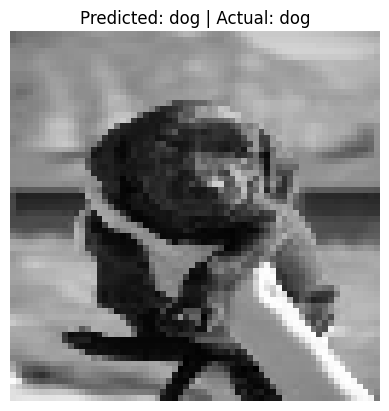

In [ ]:
svm = SVC(kernel='linear', verbose=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["cat", "dog"]))

def show_prediction(index):
    img = X_test[index].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {'dog' if y_pred[index]==1 else 'cat'} | Actual: {'dog' if y_test[index]==1 else 'cat'}")
    plt.axis('off')
    plt.show()

show_prediction(67)